In [3]:
import pandas as pd
import os
import numpy as np
import hvplot.pandas
from pathlib import Path
from bokeh.models.formatters import DatetimeTickFormatter

%matplotlib inline

from qualifier.utils.fileio import (
    read_housing_inventory_data,
    read_rental_inventory,
    read_building_completion_data,
    read_building_permits_data,
    read_labor_data,
    read_employment_data,
    read_monthly_housing_permits_data,
    read_geo_codes,
)

### Reading Cleaned Housing Inventory Data

In [4]:
wa_house_listing_county_df = read_housing_inventory_data()
wa_house_listing_county_df.head()

/Users/rupika/bootcamp/FinTech_Workspace/Project1/Alpha-Dot-Housing-Market-Analysis/qualifier/utils/cleaner.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_house_listing_df['county_name'] = wa_house_listing_df['county_name'].str.title()


,Date,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,state
0,2016-07-01,53001,Adams,125000.0,NaN,NaN,34,NaN,NaN,87.0,...,NaN,NaN,36,NaN,NaN,0.058824,NaN,NaN,0,wa
1,2016-07-01,53003,Asotin,220000.0,NaN,NaN,120,NaN,NaN,61.0,...,NaN,NaN,120,NaN,NaN,NaN,NaN,NaN,0,wa
2,2016-07-01,53005,Benton,286500.0,NaN,NaN,629,NaN,NaN,42.0,...,NaN,NaN,629,NaN,NaN,0.000000,NaN,NaN,0,wa
3,2016-07-01,53007,Chelan,394000.0,NaN,NaN,502,NaN,NaN,60.0,...,NaN,NaN,510,NaN,NaN,0.015936,NaN,NaN,0,wa
4,2016-07-01,53009,Clallam,325000.0,NaN,NaN,596,NaN,NaN,66.0,...,NaN,NaN,596,NaN,NaN,NaN,NaN,NaN,0,wa


### Rental Data County and City wise.

In [27]:
rental_df = read_rental_inventory()
rental_county_df = rental_df[0]
rental_city_df = rental_df[1]

display(rental_county_df.head(2))
display(rental_city_df.head(2))

,Date,County_Name,FIPS_Code,Average_Rental_Price
1,2017-01-01,Clark,53011,1294.0
2,2017-01-01,Grant,53025,961.0


,Date,City_Name,FIPS_Code,Average_Rental_Price
0,2017-01-01,Auburn,5303180,1278.0
1,2017-01-01,Bellevue,5305210,2063.0


### Building Completion Data County and Citywise.

In [9]:
building_completion_df = read_building_completion_data()
building_completion_county_df = building_completion_df[0]
building_completion_city_df = building_completion_df[1]

# Displaying the transformed Building Units DataFrames.
display(building_completion_county_df.head(2))
display(building_completion_city_df.head(2))

,Date,COUNTIES,Units_Completed
0,2016/17,Adams,146.0
1,2016/17,Asotin,29.0


,Date,CITIES,Units_Completed
0,2016/17,Aberdeen,6.0
1,2016/17,Airway Heights,31.0


### Building Permits Data County and Citywise.

In [17]:
building_permit_df = read_building_permits_data()
building_permit_county_df = building_permit_df[0]
building_permit_city_df = building_permit_df[1]

# Displaying the transformed Building Unit Permits DataFrames.
display(building_permit_county_df.head(2))
display(building_permit_city_df.head(2))

,Date,COUNTIES,Units_Permitted
0,2016,Adams,31.0
1,2016,Asotin,63.0


,Date,CITIES,Units_Permitted
0,2016,Aberdeen,5.0
1,2016,Airway Heights,33.0


### Labor and Employment Data Countywise.

In [21]:
# Reading Countywise Labor Force Data From `wa_labor_force_by_county.csv` 
wa_labor_force_df = read_labor_data()

# Reading Countywise Labor Force Data From `wa_employment_by_county.csv`
wa_employment_df = read_employment_data()

display(wa_labor_force_df.head(2))
display(wa_employment_df.head(2))

,Date,FIPS_CODE,LABOR_NO.
0,2017-01-01,53011,226512.0
1,2017-01-01,53025,41475.0


,Date,FIPS_CODE,EMP_NO.
0,2017-01-01,53011,213014.0
1,2017-01-01,53025,37313.0


### Housing Permits Data Countywise.

In [7]:
monthly_housing_permits_data = read_monthly_housing_permits_data()
monthly_housing_permits_data.head()

/Users/rupika/bootcamp/FinTech_Workspace/Project1/Alpha-Dot-Housing-Market-Analysis/qualifier/utils/cleaner.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_units_df['Date'] = pd.to_datetime(housing_units_df['Date'], format='%Y%m')
/Users/rupika/bootcamp/FinTech_Workspace/Project1/Alpha-Dot-Housing-Market-Analysis/qualifier/utils/cleaner.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_units_df['FIPS_CODE'] = housing_units_df['County'].apply(lambda x: create_code(x))
/Users/rupika/

,Date,FIPS_CODE,Name,Total_Housing_Units
6679,2017-01-01,53005,Benton County,60
6680,2017-01-01,53011,Clark County,262
6681,2017-01-01,53021,Franklin County,28
6682,2017-01-01,53031,Jefferson County,10
6683,2017-01-01,53033,King County,1005


### Reading Geocodes

In [32]:
geocode_df = read_geo_codes()

### Rental Data Analysis - City Wise

In [10]:
#Plotting the visualization for city wise 
rental_city_df.hvplot(
    title='Rental Growth from 2017 to 2021',
    x='Date',
    y='Average_Rental_Price',
    widget_location='left_top',
    kind='line',
    groupby='City_Name',
    grid=True
)

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='City_Name', options=['Auburn', 'Bellevue', ...], value='Auburn', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [11]:
#Formatting table and slicing dataframe to only few cities for further analysis
sliced_city_rental_df = pd.pivot_table(rental_city_df,values='Average_Rental_Price',
                      index=['Date'],
                      columns=['City_Name'])
sliced_city_rental_df = sliced_city_rental_df[['Seattle','Bellevue','Bothell','Everett','Kirkland','Issaquah']]

#Displaying sliced dataframe
display(sliced_city_rental_df.head())

City_Name,Seattle,Bellevue,Bothell,Everett,Kirkland,Issaquah
Date,,,,,,
2017-01-01,1681.0,2063.0,1624.0,1223.0,1888.0,2065.0
2017-02-01,1713.0,2099.0,1643.0,1220.0,1930.0,2094.0
2017-03-01,1742.0,2158.0,1728.0,1252.0,1972.0,2106.0
2017-04-01,1773.0,2201.0,1787.0,1262.0,2029.0,2161.0
2017-05-01,1814.0,2224.0,1854.0,1292.0,2082.0,2242.0


<AxesSubplot:title={'center':'Rental growth city wise from 2017 to 2021'}, xlabel='Year', ylabel='Average Rental Price'>

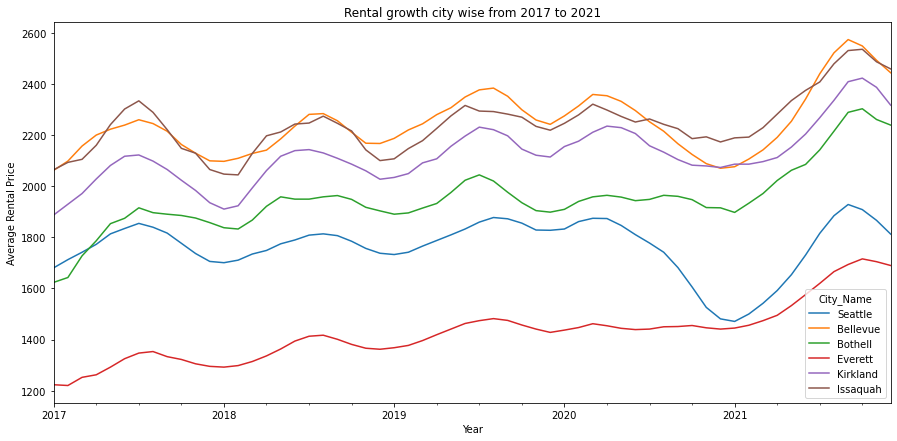

In [16]:
#Plotting the sliced dataframe for visualization 
sliced_city_rental_df.plot(
    figsize=(15,7),
    title = "Rental growth city wise from 2017 to 2021",
    xlabel='Year',
    ylabel='Average Rental Price'
)

### Rental Data Analysis - County Wise

In [18]:
#Plotting the visualization for county wise
rental_county_df.hvplot(
    title='Rental Growth from 2017 to 2021',
    x='Date',
    y='Average_Rental_Price',
    widget_location='left_top',
    kind='line',
    groupby='County_Name',
    grid=True
)

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='County_Name', options=['Clark', 'Grant', ...], value='Clark', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [19]:
#Formatting table and slicing dataframe to only 3 counties for further analysis
sliced_county_rental_df = pd.pivot_table(rental_county_df,values='Average_Rental_Price',
                      index=['Date'],
                      columns=['County_Name'])
sliced_county_rental_df = sliced_county_rental_df[['King','Snohomish','Pierce']]

#Displaying sliced dataframe
display(sliced_county_rental_df.head())

County_Name,King,Snohomish,Pierce
Date,,,
2017-01-01,1672.0,1448.0,1218.0
2017-02-01,1700.0,1454.0,1215.0
2017-03-01,1730.0,1485.0,1245.0
2017-04-01,1760.0,1509.0,1264.0
2017-05-01,1796.0,1541.0,1298.0


<AxesSubplot:title={'center':'Rental Growth from 2017 to 2021'}, xlabel='Year', ylabel='Average Rental Price'>

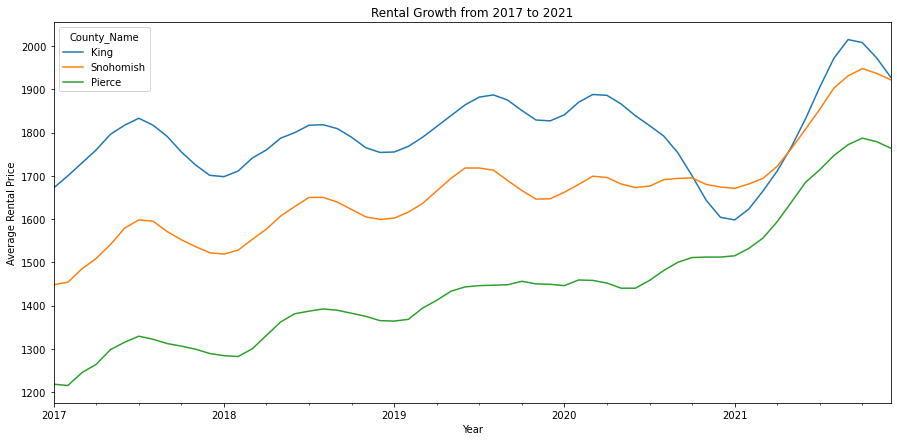

In [20]:
#Plotting the sliced dataframe for visualization 
sliced_county_rental_df.plot(
    figsize=(15,7),
    title = "Rental Growth from 2017 to 2021",
    xlabel='Year',
    ylabel='Average Rental Price'
)

### City Affordability Index Analysis

In [21]:
#Reading the csv file into dataframe
city_affordability_indices = pd.read_csv(
    Path("Resources/CityAffordabilityIndices.csv"),
    index_col='Areas',
)

#Displaying the dataframe
city_affordability_indices.head()

,2017,2018,2019,2020
Areas,,,,
Aberdeen,193.3,141.5,143.7,157.3
Airway Heights,137.5,115.0,118.0,117.3
Anacortes,83.6,72.0,81.5,75.9
Arlington,113.0,102.4,112.1,107.1
Auburn,99.1,90.6,97.6,104.1


In [26]:
#Plotting the whole dataframe only for 2017 for analysis
city_affordability_indices['2020'].hvplot.bar(
    legend=True,
    width=1200,
    height=700,
    title='City Affordability Index - 2017',
    color="brown",
    ylabel= "Index",
    xlabel= "Cities",
    rot=45
)

:Bars   [Areas]   (2020)

In [27]:
city_index=city_affordability_indices.reset_index()
cities = ['Seattle','Bellevue','Bothell','Everett','Kirkland','Issaquah','Snoqualmie','Yakima','Lake Stevens']  
city_index = city_index[city_index.Areas.isin(cities)].set_index('Areas')
city_index.head()

,2017,2018,2019,2020
Areas,,,,
Bellevue,66.9,63.8,73.5,74.7
Bothell,81.9,73.2,86.4,95.2
Everett,85.1,75.0,82.2,80.1
Issaquah,82.6,69.2,87.3,91.3
Kirkland,82.0,68.8,83.7,85.6


In [28]:
#Creating year wise separate dataframes for city affordability indexs plotting
df_2017 = city_index['2017'].hvplot.bar(
    legend=True,
    width=300,
    height=300,
    title='City Affordability Index',
    color="Orange").opts(invert_axes=True)
df_2018 = city_index['2018'].hvplot.bar(
    legend=True,
    width=300, height=300,
    title='City Affordability Index',
    color="Pink").opts(invert_axes=True)
df_2019 = city_index['2019'].hvplot.bar(
    legend=True,
    width=300,
    height=300,
    title='City Affordability Index',
    color="Yellow").opts(invert_axes=True)
df_2020 = city_index['2020'].hvplot.bar(
    legend=True,
    width=300,
    height=300,
    title='City Affordability Index',
    color="Turquoise").opts(invert_axes=True)

#Plotting all year dataframes side by side for better Visualization and analysis
df_2017 + df_2018 + df_2019 + df_2020

:Layout
   .Bars.A_2017 :Bars   [Areas]   (2017)
   .Bars.A_2018 :Bars   [Areas]   (2018)
   .Bars.A_2019 :Bars   [Areas]   (2019)
   .Bars.A_2020 :Bars   [Areas]   (2020)

# House Listing Prices Analysis

## Narrowing Down on Columns and Counties for Visualizations

In [31]:
#Creating a table for the three counties for the median listing price
h_df = wa_house_listing_county_df[['Date','county_name','median_listing_price']]
h_df = pd.pivot_table(h_df,values='median_listing_price',
                     index=['Date'],
                     columns=['county_name'])
h_df = h_df[['King','Snohomish','Pierce']]
display(h_df.head())

county_name,King,Snohomish,Pierce
Date,,,
2016-07-01,565000.0,399500.0,324950.0
2016-08-01,554997.5,394975.0,322475.0
2016-09-01,549975.0,399700.0,319475.0
2016-10-01,559000.0,399995.0,315000.0
2016-11-01,550000.0,409975.0,312475.0


In [32]:
#Plot the line graph of the three counties to compare the median listing price
h_df.hvplot.line(
    xlabel='Date',
    ylabel='Median Listing Price',
    title='Median Listing Price by Date',
    rot=30).opts(yformatter='%.0f')

:NdOverlay   [county_name]
   :Curve   [Date]   (value)

In [6]:
#Create a bar plot of the average listing price by date grouped by the county
# formatter = DatetimeTickFormatter(months='%b %Y')
formatter = DatetimeTickFormatter(months='%Y-%m')

wa_house_listing_county_df.hvplot.bar(
    x='Date',
    y='average_listing_price',
    groupby='county_name',
    title='Average Listing Price by Date',
    rot=90).opts(yformatter=formatter)

:DynamicMap   [county_name]
   :Bars   [Date]   (average_listing_price)

In [7]:
#Create a bar plot of the average listing price by county
wa_house_listing_county_df.hvplot.bar(
    x='county_name',
    y='average_listing_price',
    groupby='Date',
    title='Average Listing Price by County',
    rot=50).opts(yformatter='%.0f')

:DynamicMap   [Date]
   :Bars   [county_name]   (average_listing_price)

In [11]:
#Create a bar plot of the units completed by the county 
building_completion_county_df.hvplot.bar(
    x='Date',
    ylabel='Units Completed',
    groupby='COUNTIES',
    title='County Units Completed by Year',
    rot=30,
    color='Brown'
).opts(yformatter='%.0f')

:DynamicMap   [COUNTIES]
   :Bars   [Date]   (Units_Completed)

In [12]:
#Create a bar plot of the units completed by the city 
building_completion_city_df.hvplot.bar(
    x='Date',
    y='Units_Completed',
    groupby='CITIES',
    title='City Units Completed by Year',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [CITIES]
   :Bars   [Date]   (Units_Completed)

In [14]:
b_df = building_completion_county_df[['Date','COUNTIES','Units_Completed']]
b_df = pd.pivot_table(b_df,values='Units_Completed',
                     index=['Date'],
                     columns=['COUNTIES'])
b_df = b_df[['King','Snohomish','Pierce']]
display(b_df.head())

COUNTIES,King,Snohomish,Pierce
Date,,,
2016/17,14810.0,3556.0,4277.0
2017/18,15104.0,4768.0,3743.0
2018/19,18851.0,4230.0,3661.0
2019/20,17182.0,4479.0,4499.0
2020/21,15261.0,5220.0,4690.0


In [15]:
#Creating a bar plot for the three counties 
b_df.hvplot.bar(
    xlabel='Year',
    ylabel='Units Completed',
    title='County Units Completed by Year',
    rot=30,    
).opts(yformatter='%.0f')

:Bars   [Date,COUNTIES]   (value)

In [18]:
#Creating a bar plot of the building permits for the county
building_permit_county_df.hvplot.bar(
    x='Date',
    y='Units_Permitted',
    groupby='COUNTIES',
    title='County Units Permitted by Date',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [COUNTIES]
   :Bars   [Date]   (Units_Permitted)

In [19]:
#Creating a bar plot of the building permits for the county
building_permit_city_df.hvplot.bar(
    x='Date',
    y='Units_Permitted',
    groupby='CITIES',
    title='City Units Permitted by Date',
    rot=30,
    color='pink'
).opts(yformatter='%.0f')

:DynamicMap   [CITIES]
   :Bars   [Date]   (Units_Permitted)

### Employement Data Visualization

In [22]:
#Create a line plot to show the employment rate by county
wa_employment_df.hvplot(
    x='Date',
    y='EMP_NO.',
    groupby='FIPS_CODE',
    title='Washington Employment by Date',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [FIPS_CODE]
   :Curve   [Date]   (EMP_NO.)

### Employement Data Visualization

In [24]:
#Create a line plot to show the labor force by county
wa_labor_force_df.hvplot(
    x='Date',
    y='LABOR_NO.',
    groupby='FIPS_CODE',
    title='Washington Labor Force by Date',
    rot=30
).opts(yformatter='%.0f')

:DynamicMap   [FIPS_CODE]
   :Curve   [Date]   (LABOR_NO.)

# Calculating Single Family Rental Returns by County

### Monthly housing Investment yield for each county

In [25]:
# Monthly Housing Yield is `median_listing_price_per_square_foot_mm`(change in monthly median price compared to previous month)for latest month ie., `2021-12-01`
housing_yield = wa_house_listing_county_df[wa_house_listing_county_df['Date'] == '2021-12-01']
housing_yield = housing_yield[['county_fips','county_name','median_listing_price_per_square_foot_mm']]
housing_yield['percent_median_listing_price_per_square_foot_mm'] = housing_yield['median_listing_price_per_square_foot_mm'] * 100
housing_yield.head()

,county_fips,county_name,median_listing_price_per_square_foot_mm,percent_median_listing_price_per_square_foot_mm
2534,53001,Adams,-0.0399,-3.99
2535,53003,Asotin,0.0834,8.34
2536,53005,Benton,0.0401,4.01
2537,53007,Chelan,0.0082,0.82
2538,53009,Clallam,0.0232,2.32


### Calculating Monthly Rental Yield

Monthly Rental_Yield = ( Monthly Average Rent  / Monthly Average Listing Price ) * 100

In [28]:
# Monthly Average Rent is `Average_Rental_Price` for latest month ie., `2021-12-01`
monthly_rental_return = rental_county_df[rental_county_df['Date'] == '2021-12-01']
monthly_rental_return.head()

,Date,County_Name,FIPS_Code,Average_Rental_Price
532,2021-12-01,Clark,53011,1743.0
533,2021-12-01,Grant,53025,1094.0
534,2021-12-01,King,53033,1928.0
535,2021-12-01,Kitsap,53035,2049.0
536,2021-12-01,Pierce,53053,1764.0


In [29]:
# Monthly Average Listing Price is `average_listing_price` for latest month ie., `2021-12-01`
avg_housing_price = wa_house_listing_county_df[wa_house_listing_county_df['Date'] == '2021-12-01']
avg_housing_price = avg_housing_price[['county_fips','average_listing_price']]

In [36]:
#Calculating rental_yield using the formula `rental_yield_df[Average_Rental_Price] / rental_yield_df[average_listing_price]`

rental_yield_df = pd.merge(monthly_rental_return, avg_housing_price, left_on='FIPS_Code', right_on='county_fips')
rental_yield_df['yield'] = rental_yield_df['Average_Rental_Price'] / rental_yield_df['average_listing_price']
rental_yield_df['yield'] = rental_yield_df['yield'] * 100
rental_yield_df = rental_yield_df[['FIPS_Code','County_Name','Average_Rental_Price','average_listing_price','yield']]
rental_yield_df.head()

,FIPS_Code,County_Name,Average_Rental_Price,average_listing_price,yield
0,53011,Clark,1743.0,7.109377e+05,0.245169
1,53025,Grant,1094.0,4.532759e+05,0.241354
2,53033,King,1928.0,1.120119e+06,0.172125
3,53035,Kitsap,2049.0,7.898085e+05,0.259430
4,53053,Pierce,1764.0,6.721828e+05,0.262429


### Calculating Annualized Total Return

Annualized Total Return = ( House_Value_Monthly_Yield  + Rental_Yield ) * 12

In [39]:
# Merging Monthly housing Investment yield and Monthly Rental Yield For Each County
annualized_total_return = pd.merge(housing_yield, rental_yield_df, left_on='county_fips', right_on='FIPS_Code')
annualized_total_return = annualized_total_return[['county_name','FIPS_Code','percent_median_listing_price_per_square_foot_mm','yield']]
annualized_total_return['total_yield'] = annualized_total_return['percent_median_listing_price_per_square_foot_mm'] + annualized_total_return['yield']
annualized_total_return['yearly_total_yield'] = annualized_total_return['total_yield'] * 12
annualized_total_return = pd.merge(left=annualized_total_return, 
                       right=geocode_df,
                       left_on='FIPS_Code',
                       right_on='GEOID',
                       )
annualized_total_return = annualized_total_return[['county_name', 'FIPS_Code','total_yield',
       'yearly_total_yield', 'INTPTLAT', 'INTPTLONG']]

annualized_total_return

,county_name,FIPS_Code,total_yield,yearly_total_yield,INTPTLAT,INTPTLONG
0,Clark,53011,0.515169,6.182030,45.771730,-122.485953
1,Grant,53025,0.581354,6.976249,47.213633,-119.467788
2,King,53033,1.492125,17.905495,47.490552,-121.833977
3,Kitsap,53035,0.139430,1.673160,47.639595,-122.649634
4,Pierce,53053,2.602429,31.229143,47.051413,-122.153240
5,Snohomish,53061,1.142906,13.714871,48.054913,-121.765038
6,Spokane,53063,2.302158,27.625890,47.620375,-117.403371
7,Thurston,53067,1.991779,23.901348,46.935822,-122.830152


In [38]:
annualized_total_return.hvplot.points(
    'INTPTLONG',
    'INTPTLAT',
    geo=True,
    color= 'county_name',
    size= 'yearly_total_yield',
    tiles='OSM',
    scale=5,
    title = 'Yearly Yield(Proxy) for Counties',
    xlabel = 'Latitude',
    ylabel = 'Longitude',
    hover_cols = ['county_name','yearly_total_yield'],
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [INTPTLONG,INTPTLAT]   (county_name,yearly_total_yield)